In [41]:
# imports

import skimage
from skimage import io, exposure
from skimage.filters import threshold_local
import imshowpair

import numpy as np
import matplotlib.pyplot as plt

from skimage.util import img_as_ubyte
from skimage import data
from skimage.color import rgb2gray

from skimage.draw import rectangle_perimeter, set_color

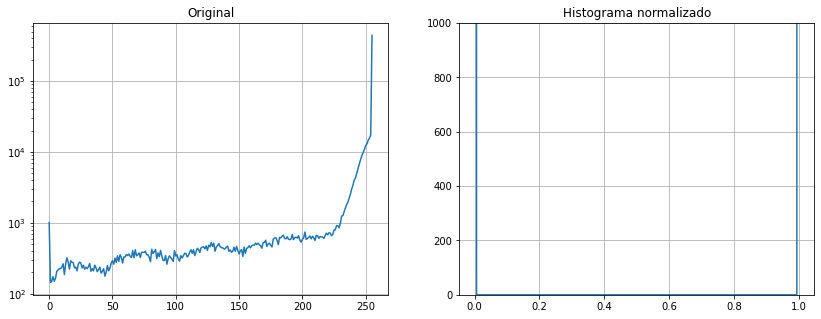

In [56]:
# the 2o argument (e.g. np.float64) converts rgb image to grayscale

filepath = 'images/example_0.jpg';
image = io.imread(filepath)
# image = io.imread('images/teste.jpg', np.float64)


image_gray = rgb2gray(image)
# assure pixels are represented in 0-255 range
image_255 = img_as_ubyte(image_gray)
threshold = 200
image_bin = image_255 > threshold

# compare histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
hist_y, hist_x = exposure.histogram(image)
ax1.plot(hist_x, hist_y)
ax1.set_title('Original')
ax1.set_yscale('log')
ax1.grid()

hist_y, hist_x = exposure.histogram(image_bin)
ax2.plot(hist_x, hist_y)
ax2.set_title('Histograma normalizado')
ax2.set_ylim(0,1000)
ax2.grid()
plt.show()

# save  image
filepath_binary = filepath.split('.')[0] + '_binary.' + filepath.split('.')[1]
io.imsave(filepath_binary, image_bin)

# block_size = 11
# image_bin = threshold_local(image, block_size, offset=40)


# plt.show()

# imshowpair.imshowpair(image, image_bin, cmap='gray')
# plt.show()

In [42]:
def draw_rect(image, start, end):

    # rectangle_perimeter generates coordinates of pixels that are exactly around a rectangle
    r, c = rectangle_perimeter(start, end=end, shape=image.shape)
    
    image[r, c] = (255, 255, 0)
    # or set_color(image, (r,c), (255,255,0))

# Algorithm

th = 0.2 # 0 to 1
min_row_ctr = 5

px_rows = image_bin.shape[0]
px_cols = image_bin.shape[1]

text_lines = 0
row_ctr = 0

# for every pixel row
for row in range(0, px_rows):

    bpxs = 0 # black
    wpxs = 0 # white

    # for every pixel column
    for col in range(0, px_cols):
        if image_bin[row][col] == 0:
            # black
            bpxs = bpxs + 1
        else:
            # white
            wpxs = wpxs + 1

    # print(bpxs/px_cols)

    if bpxs/px_cols >= th:
        row_ctr = row_ctr + 1

    elif row_ctr >= min_row_ctr:
        # a text line was identified
        text_lines = text_lines + 1
        draw_rect(image, (row - row_ctr, 0), (row, px_cols - 1))
        row_ctr = 0

    # next pixel row or finished


print('Number of lines:', text_lines)

# save figure

filepath_result = filepath.split('.')[0] + '_result.' + filepath.split('.')[1]
io.imsave(filepath_result, image)

Number of lines: 13
